# HMW 6

In [1]:
!pip install datasets
from datasets import load_dataset
dataset = load_dataset('daily_dialog')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 33.5 MB/s 
     |████████████████████████████████| 115 kB 59.0 MB/s 
     |████████████████████████████████| 212 kB 83.9 MB/s 
     |████████████████████████████████| 163 kB 86.9 MB/s 
     |████████████████████████████████| 127 kB 79.7 MB/s 
     |████████████████████████████████| 115 kB 72.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


Generating train split:   0%|          | 0/11118 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset daily_dialog downloaded and prepared to /root/.cache/huggingface/datasets/daily_dialog/default/1.0.0/1d0a58c7f2a4dab5ed9d01dbde8e55e0058e589ab81fce5c2df929ea810eabcd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['dialog', 'act', 'emotion'],
        num_rows: 11118
    })
    validation: Dataset({
        features: ['dialog', 'act', 'emotion'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['dialog', 'act', 'emotion'],
        num_rows: 1000
    })
})

### Preprocessing

In [4]:
import re

In [5]:
def preprocessing(sentence):
  # strip removes space from begining and end of a string
  senetence = sentence.lower().strip()
  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  sentence = re.sub(r'([!?.,])', r" \1",sentence)
  # 'he is a boy?   how' -> he is a boy ? how
  sentence = re.sub(r'[" "]+', " ", sentence)
  # removing contractions
  sentence = re.sub(r"i'm", "i am", sentence)
  sentence = re.sub(r"he's", "he is", sentence)
  sentence = re.sub(r"she's", "she is", sentence)
  sentence = re.sub(r"it's", "it is", sentence)
  sentence = re.sub(r"that's", "that is", sentence)
  sentence = re.sub(r"what's", "what is", sentence)
  sentence = re.sub(r"where's", "where is", sentence)
  sentence = re.sub(r"how's", "how is", sentence)
  sentence = re.sub(r"\'ll", " will", sentence)
  sentence = re.sub(r"\'ve", " have", sentence)
  sentence = re.sub(r"\'re", " are", sentence)
  sentence = re.sub(r"\'d", " would", sentence)
  sentence = re.sub(r"\'re", " are", sentence)
  sentence = re.sub(r"won't", "will not", sentence)
  sentence = re.sub(r"can't", "cannot", sentence)
  sentence = re.sub(r"n't", " not", sentence)
  sentence = re.sub(r"n'", "ng", sentence)
  sentence = re.sub(r"'bout", "about", sentence)
  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
  sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
  sentence = sentence.strip()
  return senetence

In [6]:
import numpy as np

In [7]:
def reading_data(dialogs):
  all_sentences_of_text = []
  for one_dialog in dialogs:
    for i in range(0,len(one_dialog)-1):
      sent_1 = preprocessing(one_dialog[i])
      sent_2 = preprocessing(one_dialog[i+1])
      all_sentences_of_text.append(sent_1)
      all_sentences_of_text.append("[start] " + sent_2 + " [end]")
  return all_sentences_of_text

In [8]:
train_dialogs = reading_data(dataset['train']['dialog'])
test_dialogs = reading_data(dataset['test']['dialog'])
val_dialogs = reading_data(dataset['validation']['dialog'])

In [9]:
for x in dataset['train']['dialog'][:1]:
  for sent in x :
    print(sent)

Say , Jim , how about going for a few beers after dinner ? 
 You know that is tempting but is really not good for our fitness . 
 What do you mean ? It will help us to relax . 
 Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ? 
 I guess you are right.But what shall we do ? I don't feel like sitting at home . 
 I suggest a walk over to the gym where we can play singsong and meet some of our friends . 
 That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them . 
 Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too . 
 Good.Let ' s go now . 
 All right . 


In [10]:
dataset = train_dialogs + test_dialogs + val_dialogs

In [11]:
len(dataset)

179722

In [12]:
def creating_pairs(pair_name):
  index = len(pair_name)
  pair_input = [pair_name[x] for x in range(0,index) if x%2 ==0]
  pair_output = [pair_name[x] for x in range(0,index) if x% 2 ==1]
  pairs = [(input,output) for input,output in zip(pair_input, pair_output)]
  return pairs

In [13]:
train_pairs = creating_pairs(train_dialogs)
test_pairs = creating_pairs(test_dialogs)
val_pairs = creating_pairs(val_dialogs)

In [14]:
train_pairs[0]

('say , jim , how about going for a few beers after dinner ?',
 '[start] you know that is tempting but is really not good for our fitness . [end]')

In [15]:
index = len(dataset)
inp_texts = [dataset[i] for i in range(0,index) if i % 2 == 0]
out_texts = [dataset[i] for i in range(0,index) if i % 2 == 1]

In [16]:
print(inp_texts[:3])
print('------')
print(out_texts[:3])

['say , jim , how about going for a few beers after dinner ?', 'you know that is tempting but is really not good for our fitness .', 'what do you mean ? it will help us to relax .']
------
['[start] you know that is tempting but is really not good for our fitness . [end]', '[start] what do you mean ? it will help us to relax . [end]', "[start] do you really think so ? i don't . it will just make us fat and act silly . remember last time ? [end]"]


### Vectorization

In [17]:
import string
from tensorflow.keras.layers import TextVectorization
import tensorflow as tf
import numpy as np

In [18]:
# define how many words we have in corpus (we can create int for each unique of them)
vocab_size = 15000
# define maxium output length
sequence_length = 40
batch_size = 64

In [19]:
strip_chars = string.punctuation
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")
strip_chars = strip_chars.replace("?", "")
strip_chars = strip_chars.replace("!", "")
strip_chars = strip_chars.replace(".", "")
strip_chars = strip_chars.replace(",", "")

In [20]:
# replace strip_chars  with ''
def custom_standardization(input_string):
  lowercase = tf.strings.lower(input_string)
  return tf.strings.regex_replace(lowercase, "[%s]" % re.escape(strip_chars), "")

In [21]:
inp_vectorization = TextVectorization(max_tokens = vocab_size, output_mode = 'int', output_sequence_length = sequence_length, standardize=custom_standardization)

In [22]:
out_vectorization = TextVectorization(max_tokens=vocab_size, output_mode="int", output_sequence_length=sequence_length+1, standardize=custom_standardization)

In [23]:
inp_vectorization.adapt(inp_texts)
out_vectorization.adapt(out_texts)

In [24]:
def format_dataset(inp, out):
    inp = inp_vectorization(inp)
    out = out_vectorization(out)
    # decoder input is encoder output without [end]
    # decoder output is without [start]
    return ({"encoder_inputs": inp, "decoder_inputs": out[:, :-1],}, out[:, 1:])

In [25]:
def make_dataset(pairs):
    inp_texts, out_texts = zip(*pairs)
    inp_texts = list(inp_texts)
    out_texts = list(out_texts)
    dataset = tf.data.Dataset.from_tensor_slices((inp_texts, out_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset)
    return dataset.shuffle(2048).prefetch(16).cache()

In [26]:
train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)
test_ds = make_dataset(test_pairs)

In [27]:
train_ds

<CacheDataset element_spec=({'encoder_inputs': TensorSpec(shape=(None, 40), dtype=tf.int64, name=None), 'decoder_inputs': TensorSpec(shape=(None, 40), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 40), dtype=tf.int64, name=None))>

In [28]:
for inputs, targets in train_ds.take(1):
    print(f'inputs["encoder_inputs"].shape: {inputs["encoder_inputs"].shape}')
    print(f'inputs["decoder_inputs"].shape: {inputs["decoder_inputs"].shape}')
    print(f"targets.shape: {targets.shape}")

inputs["encoder_inputs"].shape: (64, 40)
inputs["decoder_inputs"].shape: (64, 40)
targets.shape: (64, 40)


## Question 1

### Model

In [29]:
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras

In [30]:
import numpy as np
embedding_matrix_inp = np.random.uniform(-1, 1, (vocab_size, 100))
embedding_matrix_out = np.random.uniform(-1, 1, (vocab_size, 100))

In [31]:
from gensim.models import Word2Vec
model_i = Word2Vec(sentences=[sentence[0].split() for sentence in train_pairs], size=100, min_count=1, window=3, workers=4, sg=1)
model_o = Word2Vec(sentences=[sentence[1].split() for sentence in train_pairs], size=100, min_count=1, window=3, workers=4, sg=1)

In [32]:
for idx, word in enumerate(inp_vectorization.get_vocabulary()):
  if word in model_i.wv.vocab:
    embedding_matrix_inp[idx] = model_i.wv[word]

In [33]:
for idx, word in enumerate(out_vectorization.get_vocabulary()):
  if word in model_o.wv.vocab:
    embedding_matrix_out[idx] = model_o.wv[word]

In [34]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, tf.newaxis, :], dtype="int32")
        # first attention in encoder
        attention_output = self.attention(
            query=inputs, value=inputs, key=inputs, attention_mask=padding_mask
        )
        # the first block in encoder
        proj_input = self.layernorm_1(inputs + attention_output)
        # second block in encoder (above picture)
        proj_output = self.dense_proj(proj_input)

        return self.layernorm_2(proj_input + proj_output)

### Trainable = True

In [51]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim,matrix_weights, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim,trainable=True, weights=[matrix_weights],mask_zero=True)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

In [52]:
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(latent_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, mask=None):
      # only word and previous word has affects (we delete the effect of next words) (below picture)
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)

        attention_output_1 = self.attention_1(
            query=inputs, value=inputs, key=inputs, attention_mask=causal_mask
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0,
        )
        return tf.tile(mask, mult)

In [53]:
embed_dim = 100
latent_dim = 2048
num_heads = 8

encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim, embedding_matrix_inp)(encoder_inputs)
# using encoder model
encoder1 = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
encoder2 = TransformerEncoder(embed_dim, latent_dim, num_heads)(encoder1)
encoder = keras.Model(encoder_inputs, encoder2)

decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")


x = PositionalEmbedding(sequence_length, vocab_size, embed_dim,embedding_matrix_out)(decoder_inputs)
# using decoder model
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
# using decoder model
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)
decoder_outputs = decoder([decoder_inputs, encoder2])

transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs, name="transformer")

In [54]:
epochs = 10 
transformer.summary()
transformer.compile("adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 positional_embedding_4 (Positi  (None, None, 100)   1504000     ['encoder_inputs[0][0]']         
 onalEmbedding)                                                                                   
                                                                                                  
 transformer_encoder_4 (Transfo  (None, None, 100)   734648      ['positional_embedding_4[0][0]'] 
 rmerEncoder)                                                                                     
                                                                                        

In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_path = '/content/drive/MyDrive/model-transformer.h5'

cp_callback = [ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, monitor = 'val_loss',mode = 'min',save_best_only=True),
               EarlyStopping(patience=10),]

In [56]:
history = transformer.fit(train_ds, epochs=epochs, validation_data=val_ds,callbacks=[cp_callback])

Epoch 1/10
1189/1189 [==============================] - 106s 86ms/step - loss: 1.7294 - accuracy: 0.2957 - val_loss: 1.4968 - val_accuracy: 0.3345
Epoch 2/10
1189/1189 [==============================] - 102s 86ms/step - loss: 1.5224 - accuracy: 0.3372 - val_loss: 1.4239 - val_accuracy: 0.3536
Epoch 3/10
1189/1189 [==============================] - 101s 85ms/step - loss: 1.4526 - accuracy: 0.3537 - val_loss: 1.3821 - val_accuracy: 0.3644
Epoch 4/10
1189/1189 [==============================] - 102s 86ms/step - loss: 1.4027 - accuracy: 0.3654 - val_loss: 1.3593 - val_accuracy: 0.3709
Epoch 5/10
1189/1189 [==============================] - 102s 86ms/step - loss: 1.3629 - accuracy: 0.3753 - val_loss: 1.3478 - val_accuracy: 0.3744
Epoch 6/10
1189/1189 [==============================] - 102s 86ms/step - loss: 1.3278 - accuracy: 0.3841 - val_loss: 1.3398 - val_accuracy: 0.3775
Epoch 7/10
1189/1189 [==============================] - 102s 86ms/step - loss: 1.2961 - accuracy: 0.3927 - val_loss: 1

In [41]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

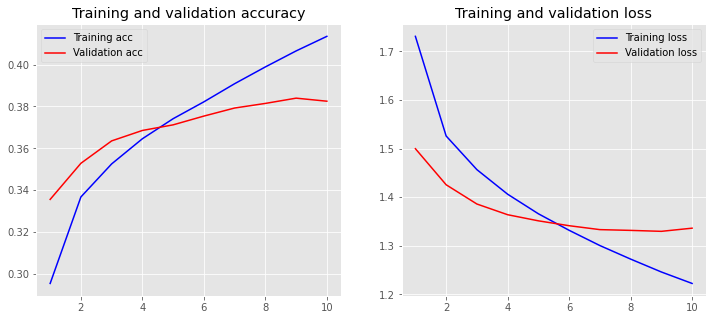

In [42]:
plot_history(history)

### Trainable = False

In [43]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim,matrix_weights, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim,trainable=False, weights=[matrix_weights],mask_zero=True)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

In [44]:
embed_dim = 100
latent_dim = 2048
num_heads = 8

encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim, embedding_matrix_inp)(encoder_inputs)
# using encoder model
encoder1 = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
encoder2 = TransformerEncoder(embed_dim, latent_dim, num_heads)(encoder1)
encoder = keras.Model(encoder_inputs, encoder2)

decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")


x = PositionalEmbedding(sequence_length, vocab_size, embed_dim,embedding_matrix_out)(decoder_inputs)
# using decoder model
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
# using decoder model
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)
decoder_outputs = decoder([decoder_inputs, encoder2])

transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs, name="transformer")

In [45]:
epochs = 10 
transformer.summary()
transformer.compile(
    "adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 positional_embedding_2 (Positi  (None, None, 100)   1504000     ['encoder_inputs[0][0]']         
 onalEmbedding)                                                                                   
                                                                                                  
 transformer_encoder_2 (Transfo  (None, None, 100)   734648      ['positional_embedding_2[0][0]'] 
 rmerEncoder)                                                                                     
                                                                                        

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_path = '/content/drive/MyDrive/model-transformer-false.h5'

cp_callback = [ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, monitor = 'val_loss',mode = 'min',save_best_only=True),
               EarlyStopping(patience=10),]

In [47]:
history_false = transformer.fit(train_ds, epochs=epochs, validation_data=val_ds,callbacks=[cp_callback])

Epoch 1/10
1189/1189 [==============================] - 103s 83ms/step - loss: 1.7406 - accuracy: 0.2924 - val_loss: 1.5111 - val_accuracy: 0.3311
Epoch 2/10
1189/1189 [==============================] - 99s 83ms/step - loss: 1.5470 - accuracy: 0.3303 - val_loss: 1.4462 - val_accuracy: 0.3479
Epoch 3/10
1189/1189 [==============================] - 98s 83ms/step - loss: 1.4899 - accuracy: 0.3429 - val_loss: 1.4045 - val_accuracy: 0.3572
Epoch 4/10
1189/1189 [==============================] - 98s 83ms/step - loss: 1.4508 - accuracy: 0.3507 - val_loss: 1.3788 - val_accuracy: 0.3633
Epoch 5/10
1189/1189 [==============================] - 99s 83ms/step - loss: 1.4211 - accuracy: 0.3570 - val_loss: 1.3628 - val_accuracy: 0.3671
Epoch 6/10
1189/1189 [==============================] - 99s 83ms/step - loss: 1.3966 - accuracy: 0.3618 - val_loss: 1.3508 - val_accuracy: 0.3718
Epoch 7/10
1189/1189 [==============================] - 99s 83ms/step - loss: 1.3764 - accuracy: 0.3665 - val_loss: 1.3386 

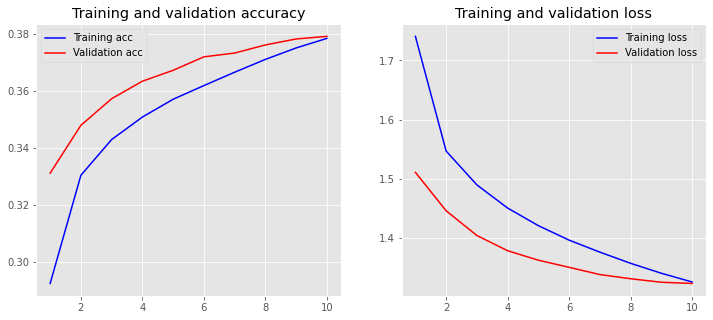

In [48]:
plot_history(history_false)

trainable=True has better accuracy.

## Question 2

In [57]:
transformer.load_weights('/content/drive/MyDrive/model-transformer.h5')

In [62]:
out_vocab = out_vectorization.get_vocabulary()
out_index_lookup = dict(zip(range(len(out_vocab)), out_vocab))
max_decoded_sentence_length = 40

def decode_sequence(input_sentence):
    tokenized_input_sentence = inp_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = out_vectorization([decoded_sentence])[:, :-1]
        predictions = transformer([tokenized_input_sentence, tokenized_target_sentence])

        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = out_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token

        if sampled_token == "[end]":
          break
    return decoded_sentence


In [66]:
input_sentence = "What do you do for your weekend?"
for idx in range(10):
  print(f'Turn {idx + 1}') 
  print(input_sentence)
  translated = decode_sequence(input_sentence)
  print(translated)
  input_sentence = translated.strip("[start]").strip("[end]")
  print('***************') 

1
What do you do for your weekend?
[start] i want to have a new job . [end]
***************
2
 i want to have a new job . 
[start] what kind of job do you want ? [end]
***************
3
 what kind of job do you want ? 
[start] i have been working in the company for a year . [end]
***************
4
 i have been working in the company for a year . 
[start] what kind of job do you want ? [end]
***************
5
 what kind of job do you want ? 
[start] i have been working in the company for a year . [end]
***************
6
 i have been working in the company for a year . 
[start] what kind of job do you want ? [end]
***************
7
 what kind of job do you want ? 
[start] i have been working in the company for a year . [end]
***************
8
 i have been working in the company for a year . 
[start] what kind of job do you want ? [end]
***************
9
 what kind of job do you want ? 
[start] i have been working in the company for a year . [end]
***************
10
 i have been working i

## Question 3

### Trainable=False

In [68]:
from tensorflow.keras.layers import Embedding,LSTM

In [71]:
sequence_length = 40
def seq2seq_model_builder(HIDDEN_DIM=300):    
  # Encoder 
  encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
  x = Embedding(input_dim=vocab_size, output_dim=100, input_length=sequence_length, trainable=False, weights=[embedding_matrix_inp])(encoder_inputs)
  encoder1, state_h, state_c = LSTM(HIDDEN_DIM, return_state=True)(x)
  # Decoder
  decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
  x = Embedding(input_dim=vocab_size, output_dim=100, input_length=sequence_length, trainable=False, weights=[embedding_matrix_out])(decoder_inputs)
  x, _, _ = LSTM(HIDDEN_DIM, return_state=True, return_sequences=True)(x, initial_state=[state_h, state_c])
  decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)

  model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
  return model

In [72]:
model = seq2seq_model_builder(HIDDEN_DIM=300)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 decoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 embedding_12 (Embedding)       (None, None, 100)    1500000     ['encoder_inputs[0][0]']         
                                                                                                  
 embedding_13 (Embedding)       (None, None, 100)    1500000     ['decoder_inputs[0][0]']         
                                                                                            

In [73]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [75]:
checkpoint_path = '/content/drive/MyDrive/model-lstm-false.ckpt'

cp_callback = [ModelCheckpoint(filepath=checkpoint_path, monitor = 'val_loss',mode = 'min',save_best_only=True),
               EarlyStopping(patience=5),]

In [78]:
history_lstm_false= model.fit(train_ds,epochs=10,validation_data=val_ds,callbacks=[cp_callback])

Epoch 1/10
1189/1189 [==============================] - ETA: 0s - loss: 1.6147 - accuracy: 0.7328

1189/1189 [==============================] - 79s 66ms/step - loss: 1.6147 - accuracy: 0.7328 - val_loss: 1.5455 - val_accuracy: 0.7412
Epoch 2/10
1189/1189 [==============================] - ETA: 0s - loss: 1.5141 - accuracy: 0.7401

1189/1189 [==============================] - 79s 67ms/step - loss: 1.5141 - accuracy: 0.7401 - val_loss: 1.4790 - val_accuracy: 0.7466
Epoch 3/10
1189/1189 [==============================] - ETA: 0s - loss: 1.4459 - accuracy: 0.7447

1189/1189 [==============================] - 80s 67ms/step - loss: 1.4459 - accuracy: 0.7447 - val_loss: 1.4353 - val_accuracy: 0.7505
Epoch 4/10
1189/1189 [==============================] - ETA: 0s - loss: 1.3926 - accuracy: 0.7480

1189/1189 [==============================] - 80s 68ms/step - loss: 1.3926 - accuracy: 0.7480 - val_loss: 1.4050 - val_accuracy: 0.7532
Epoch 5/10
1189/1189 [==============================] - ETA: 0s - loss: 1.3477 - accuracy: 0.7505

1189/1189 [==============================] - 80s 67ms/step - loss: 1.3477 - accuracy: 0.7505 - val_loss: 1.3831 - val_accuracy: 0.7550
Epoch 6/10
1189/1189 [==============================] - ETA: 0s - loss: 1.3089 - accuracy: 0.7530

1189/1189 [==============================] - 80s 67ms/step - loss: 1.3089 - accuracy: 0.7530 - val_loss: 1.3678 - val_accuracy: 0.7564
Epoch 7/10
1189/1189 [==============================] - ETA: 0s - loss: 1.2749 - accuracy: 0.7552

1189/1189 [==============================] - 80s 68ms/step - loss: 1.2749 - accuracy: 0.7552 - val_loss: 1.3569 - val_accuracy: 0.7576
Epoch 8/10
1189/1189 [==============================] - ETA: 0s - loss: 1.2449 - accuracy: 0.7574

1189/1189 [==============================] - 80s 67ms/step - loss: 1.2449 - accuracy: 0.7574 - val_loss: 1.3496 - val_accuracy: 0.7588
Epoch 9/10
1189/1189 [==============================] - ETA: 0s - loss: 1.2182 - accuracy: 0.7597

1189/1189 [==============================] - 80s 67ms/step - loss: 1.2182 - accuracy: 0.7597 - val_loss: 1.3448 - val_accuracy: 0.7597
Epoch 10/10
1189/1189 [==============================] - ETA: 0s - loss: 1.1940 - accuracy: 0.7621

1189/1189 [==============================] - 81s 68ms/step - loss: 1.1940 - accuracy: 0.7621 - val_loss: 1.3419 - val_accuracy: 0.7605


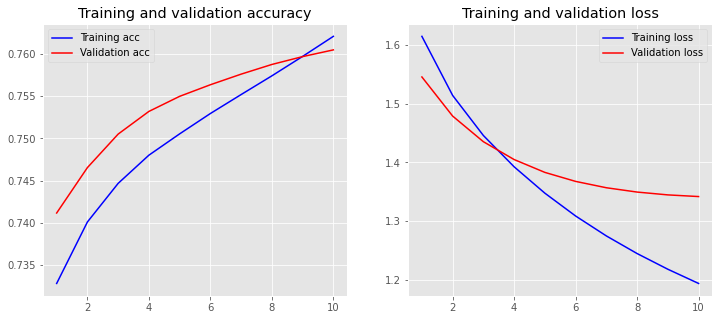

In [79]:
plot_history(history_lstm_false)

### Trainable=True

In [80]:
sequence_length = 40
def seq2seq_model_builder(HIDDEN_DIM=300):    
  # Encoder 
  encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
  x = Embedding(input_dim=vocab_size, output_dim=100, input_length=sequence_length, trainable=True, weights=[embedding_matrix_inp])(encoder_inputs)
  encoder1, state_h, state_c = LSTM(HIDDEN_DIM, return_state=True)(x)
  # Decoder
  decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
  x = Embedding(input_dim=vocab_size, output_dim=100, input_length=sequence_length, trainable=True, weights=[embedding_matrix_out])(decoder_inputs)
  x, _, _ = LSTM(HIDDEN_DIM, return_state=True, return_sequences=True)(x, initial_state=[state_h, state_c])
  decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)

  model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
  return model

In [81]:
model = seq2seq_model_builder(HIDDEN_DIM=300)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 decoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 embedding_14 (Embedding)       (None, None, 100)    1500000     ['encoder_inputs[0][0]']         
                                                                                                  
 embedding_15 (Embedding)       (None, None, 100)    1500000     ['decoder_inputs[0][0]']         
                                                                                            

In [82]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [83]:
checkpoint_path = '/content/drive/MyDrive/model-lstm-true.ckpt'

cp_callback = [ModelCheckpoint(filepath=checkpoint_path, monitor = 'val_loss',mode = 'min',save_best_only=True),
               EarlyStopping(patience=5),]

In [84]:
history_lstm_true = model.fit(train_ds,epochs=10,validation_data=val_ds,callbacks=[cp_callback])

Epoch 1/10
1189/1189 [==============================] - ETA: 0s - loss: 1.9351 - accuracy: 0.7055

1189/1189 [==============================] - 87s 71ms/step - loss: 1.9351 - accuracy: 0.7055 - val_loss: 1.6182 - val_accuracy: 0.7358
Epoch 2/10
1189/1189 [==============================] - ETA: 0s - loss: 1.5570 - accuracy: 0.7388

1189/1189 [==============================] - 84s 71ms/step - loss: 1.5570 - accuracy: 0.7388 - val_loss: 1.4891 - val_accuracy: 0.7472
Epoch 3/10
1189/1189 [==============================] - ETA: 0s - loss: 1.4526 - accuracy: 0.7467

1189/1189 [==============================] - 83s 70ms/step - loss: 1.4526 - accuracy: 0.7467 - val_loss: 1.4281 - val_accuracy: 0.7520
Epoch 4/10
1189/1189 [==============================] - ETA: 0s - loss: 1.3822 - accuracy: 0.7512

1189/1189 [==============================] - 84s 71ms/step - loss: 1.3822 - accuracy: 0.7512 - val_loss: 1.3872 - val_accuracy: 0.7556
Epoch 5/10
1189/1189 [==============================] - ETA: 0s - loss: 1.3218 - accuracy: 0.7555

1189/1189 [==============================] - 84s 70ms/step - loss: 1.3218 - accuracy: 0.7555 - val_loss: 1.3569 - val_accuracy: 0.7585
Epoch 6/10
1189/1189 [==============================] - ETA: 0s - loss: 1.2688 - accuracy: 0.7593

1189/1189 [==============================] - 84s 71ms/step - loss: 1.2688 - accuracy: 0.7593 - val_loss: 1.3375 - val_accuracy: 0.7605
Epoch 7/10
1189/1189 [==============================] - ETA: 0s - loss: 1.2222 - accuracy: 0.7630

1189/1189 [==============================] - 84s 71ms/step - loss: 1.2222 - accuracy: 0.7630 - val_loss: 1.3244 - val_accuracy: 0.7618
Epoch 8/10
1189/1189 [==============================] - ETA: 0s - loss: 1.1799 - accuracy: 0.7668

1189/1189 [==============================] - 83s 70ms/step - loss: 1.1799 - accuracy: 0.7668 - val_loss: 1.3166 - val_accuracy: 0.7627
Epoch 9/10
1189/1189 [==============================] - ETA: 0s - loss: 1.1414 - accuracy: 0.7708

1189/1189 [==============================] - 84s 71ms/step - loss: 1.1414 - accuracy: 0.7708 - val_loss: 1.3127 - val_accuracy: 0.7635
Epoch 10/10
1189/1189 [==============================] - ETA: 0s - loss: 1.1060 - accuracy: 0.7749

1189/1189 [==============================] - 84s 70ms/step - loss: 1.1060 - accuracy: 0.7749 - val_loss: 1.3118 - val_accuracy: 0.7642


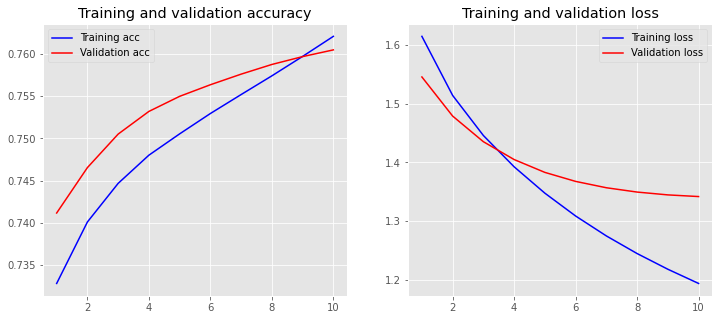

In [85]:
plot_history(history_lstm_false)

accuracy of lstm which is trainable is better

## Question 4

In [89]:
input_sentences = ['where have you been?', 'What is your name?','Where are you from?','What do you want to drink?']
for sent in input_sentences:
  print(sent)
  translated = decode_sequence(sent)
  print(translated)
  print('***************') 

where have you been?
[start] i want to go to the beach . [end]
***************
What is your name?
[start] i want to go to the movie . [end]
***************
Where are you from?
[start] i want to go to the beach . [end]
***************
What do you want to drink?
[start] i want to have a cup of coffee . [end]
***************
